# **Lab 3(b)**
# Convolution Neural Networks




---

### A long time ago, in a galaxy far far away....

Rey is a warrior who wants to reach her mentor, Luke Skywalker, to complete her training. No one has seen or communicated Skywalker, who has moved to someplace in outer planetary systems for ages. But Rey is fortunate enough to find a document that can help her to reach the destination. However, she is not familiar with the document's script (which happens to be Latin). Also, it is challenging to segment characters in a handwritten script. She can use her droid BB-8 for recognising words. There are two known representations for such words known to BB-8: **Alpha representation**( using alphabets) and **Omega representation**(using shapes). Since BB-8 is an astromech droid, he can use only one of them due to memory constraints.  Rey reaches out to you for help, and you (being an expert in script recognition and convolution neural networks) agree to help her. You are supposed to carry out experiments in the following section to determine which representation could help her.

*May the force be with you!!*

---

# Task: Word Recognition

You have to train a deep CNN model that can help in recognising a word, i.e. given a word-image(image with a word present in it) as input, the model yields a representation that can help in recognising the word from a set of possible words (termed as  'lexicon' of words). 

---

## Representations of the word

There are two representations for a word:

1. **Alpha representation**: This is based on the claim that a word can be represented in terms of occurences of characters in various segments of image.

The word is split into equal parts at various levels.

At level *i*:  
* A word is split into *i* (nearly) equal segments.  
* For every segment, we compute a binary vector in which each segment correspond to alphabets/characters (Shown in fig.).

![Alpha Vector](https://drive.google.com/uc?export=view&id=17rUvYXvWUc2IP8aD-O3kualSjr2dcn2b)

*  Individual vectors of each segment are concatenated after one another, i.e. the level vector is obtained by concatenating individual vectors of first segment followed by second, third and so on.

The final vector is obtained by concatenating vectors of all levels $\{L_i.L_{i+1}.L_{i+2}\cdots\}$.


*For this assignment, you are supposed to use levels 2-5. 
This makes the length of final Alpha vector to be (2+3+4+5) * 26 = 364*



2. **Omega representation**: This is based on the claim that a word can be represented in terms of count of 11 primitve shapes present in various segments of image. The 11 shapes are: *ascender, descender, left small semi-circle, right small semi-circle, left large semi-circle, right large semi-circle, circle, vertical line, diagonal line, diagonal line at a slope of 135 degrees, and horizontal line*. These have been shown in figure.

![Primary Shapes](https://drive.google.com/uc?export=view&id=1573VBQwD03ae_UBjDaYk4fq84bGmDzr2)

The word is split into equal parts at various levels.

At level *i*:  
* A word is split into *i* (nearly) equal segments.  
* For every segment, we compute a vector in which each segment correspond to count of a shape.

![Omega for anagram](https://drive.google.com/uc?export=view&id=1nk1pj0yp5wunCxYeUp5ppH8hdsHF41rv)


*  Individual vectors of each segment are concatenated after one another, i.e. the level vector is obtained by concatenating individual vectors of first segment followed by second, third and so on.

The final vector is obtained by concatenating vectors of all levels $\{L_i.L_{i+1}.L_{i+2}\cdots\}$.

*For this assignment, you are supposed to use levels 1-5. 
This makes the length of final Omega vector to be (1+2+3+4+5) * 11 = 165*

---

**Note**: For both representations, while splitting, in case of unequal lengths of segments, segments at the end should be of more length e.g. Level 3 split of "omega" = {o,me,ga} and "play" = {p,l,ay}. Also, for a smaller words like "ok" level 3 split = {$\epsilon$,o,k} where $\epsilon$ = empty string. 

---

Your final goal of this assignment is to detemine which representation will be more helpful for word recognition. 



In [ ]:
# Import the necessary libraries
!pip install pyyaml h5py 
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import random

# If using Google Colab, use the following package to display the image
# If running on your local system, cv2.imshow shall work fine
# If running on your local system please comment the line below
from google.colab.patches import cv2_imshow

In [ ]:
IMG_HEIGHT = 50
IMG_WIDTH = 250

# Dataset

The dataset used here is a synthetic word recognition dataset. It consists of images of lowercase English words, generated with handwritten-fonts. All images are single channel (grayscale) and have size 250 * 50. <br>

The dataset has the following directory structure:

<pre>
<b>WR-Dataset</b>
|__ <b>train</b>: [foo_1.png, bar_2.png, sample_3.png ....]
|__ <b>validation</b>: [foo_221.png, bar_322.png, sample_353.png ....]
|__ <b>test</b>: [bar_521.png, foo_272.png, example_433.png ....]
|__ <b>Alphabet.csv</b>
    
</pre>

Extract the paths of these directories onto different variables to facilitate accessing the dataset and thereby training the model.

In [ ]:
#Add the paths for train, validation and test directories

train_dir_path="/content/drive/MyDrive/WR-Dataset/Train"
validation_dir_path="/content/drive/MyDrive/WR-Dataset/Validation"
test_dir_path="/content/drive/MyDrive/WR-Dataset/Test"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Visualizing sample images

Prepare an image to label map and visualize 5 randomly chosen images from training, validation and test sets (along with their labels). Also, Mention the number of word classes present in each of the three sets.

----

**(1+1+1) points**

---

               Image     Label
0     national_5.png  national
1         much_5.png      much
2           no_3.png        no
3          not_2.png       not
4         name_3.png      name
...              ...       ...
2047        am_5.png        am
2048      also_0.png      also
2049      also_2.png      also
2050     after_7.png     after
2051     after_3.png     after

[2052 rows x 2 columns]
               Image     Label
0     national_5.png  national
1         much_5.png      much
2           no_3.png        no
3          not_2.png       not
4         name_3.png      name
...              ...       ...
2047        am_5.png        am
2048      also_0.png      also
2049      also_2.png      also
2050     after_7.png     after
2051     after_3.png     after

[2052 rows x 2 columns]
             Image    Label
0      after_6.png    after
1      about_2.png    about
2    address_4.png  address
3    address_2.png  address
4    address_0.png  address
..             ...      ...
395     wo

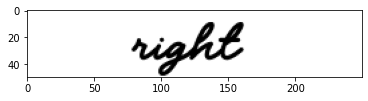

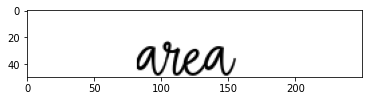

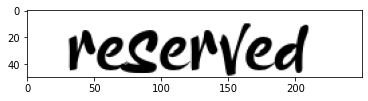

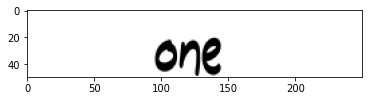

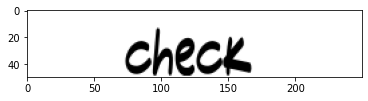

Images from validation dataset


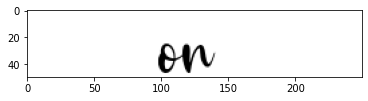

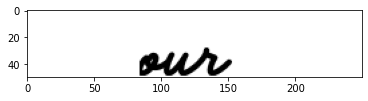

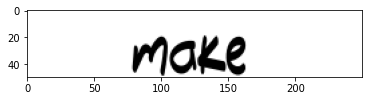

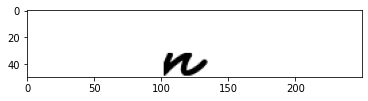

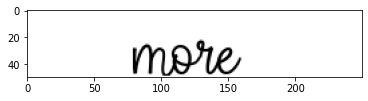

Images from test dataset


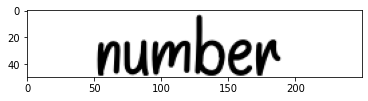

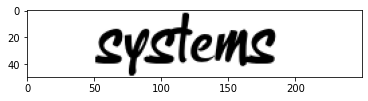

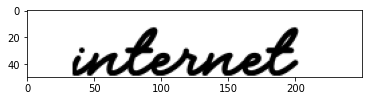

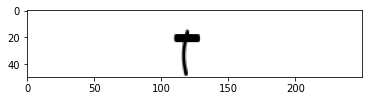

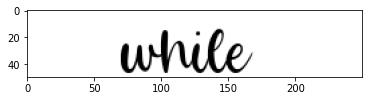

In [ ]:
# Insert code to build a dataframe with Images and their corresponding labels for 3 folders (similar to Lab 3(a))
def get_dataframe(folder_name):
    images = []
    labels = []
    # Insert code to give you list of all the image files in folder
    for fname in os.listdir(folder_name):
        img = cv2.imread(os.path.join(folder_name,fname))
        if img is not None:
            images.append(fname)
    # Insert code to get list of labels from list of images 
    # (Hint: every image file name has its label name as prefix)
    for item in images:
      st = item.split("_")[0] 
      labels.append(st)
      #print

    # Make a dataframe with two columns - Image(file name) and Label (class label)
    a_zip = zip(images, labels)
    data = list(a_zip)
    df = pd.DataFrame(data, columns = ['Image', 'Label'])
    #display and return the dataframe
    print(df)
    return df
# display the dataframes
train_df = get_dataframe(train_dir_path)
print(train_df)
test_df  = get_dataframe(test_dir_path)
print(test_df)
validation_df = get_dataframe(validation_dir_path)
print(validation_df)
#function for visualizing images
def visualize_image(img):
    # Insert your code here to visualize a given image
    img = cv2.imread(img)
    plt.figure()
    plt.imshow(img)
    plt.show()
# Visualise images from the train set
print('Images from train dataset')
for i in range(5):
    visualize_image(os.path.join(train_dir_path,train_df.Image[random.randint(0,len(train_df.Image)-1)]))

# Visualise images from the validation set
print('Images from validation dataset')
for i in range(5):
    visualize_image(os.path.join(validation_dir_path,validation_df.Image[random.randint(0,len(validation_df.Image)-1)]))

# Visualise images from the test set
print('Images from test dataset')
for i in range(5):
    visualize_image(os.path.join(test_dir_path,test_df.Image[random.randint(0,len(test_df.Image)-1)]))



Now, you will have to write modules that can give you vector representations for the input words.

---

**(3 + 3 points)**

---

In [ ]:
def get_Omega_vector(word):
  #Insert the code for a function that returns Omega representation of the input word
    
  #Hint: For computing count of segments, you can add count of shapes for individual characters (already provided in Alphabet.csv file)
  list_of_words = []
  for level in range(1,6):
        j = 0
        for i in range(level):
            length = len(word)//level
            if i + len(word)%level >= level:
                length += 1
            if j+length > len(word):
                list_of_words.append('')
            else:
                list_of_words.append(word[j:j+length])
            j += length

  alpha_df = pd.read_csv('/content/drive/MyDrive/WR-Dataset/Alphabet.csv', names= ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11'])
  vector = []
  for word in list_of_words:
        for s in alpha_df.columns:
            count = 0
            for alpha in alpha_df.index:
                for ch in word:
                    if ch==alpha:
                        count += alpha_df[s][alpha]
            vector.append(count)
  #print(len(vector))
  return vector
get_Omega_vector('word')

[1,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0]

In [ ]:
def get_Alpha_vector(word):
  vector = [0 for i in range(26)]
  list_of_words = []
  for level in range(2,6):
    words = []
    j=0
    for i in range(level):
      length = len(word)//level
      if i + len(word)%level >= level:
        length+=1
      words.append(word[j:j+length])
      j+= length
    list_of_words.append(words)
  
  
  list_=[]
  for l in list_of_words:
    for word in l:
      #print(word)
      alpha = 'abcdefghijklmnopqrstuvwzxyz'
      for elt in alpha:
        if elt in word:
          alpha = alpha.replace(elt,"1")
        alpha = alpha.replace(elt,"0")
      list_.append(alpha)
  #print(list_)
  flatlist=[]
  for sublist in list_:
    for element in sublist:
        flatlist.append(int(element))
  print(flatlist)
  return flatlist

print(get_Alpha_vector('ak'))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

To test the above modules, try printing Omega and Alpha vectors for your first name.

In [ ]:
name ="kirandeep"

print("Omega vector:",get_Omega_vector(name))

print("Alphavector:",get_Alpha_vector(name))

Omega vector: [2, 1, 4, 0, 1, 0, 3, 8, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 4, 1, 1, 0, 1, 1, 3, 0, 1, 0, 2, 4, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 1, 0, 2, 0, 0, 0, 2, 4, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

# Building Alpha model architecture 

Following is the architecture of the model that will learn Alpha representation:

Input shape: 250 * 50 ( RGB )


* 2 Convolution layers with 64  filters
* A Max Pool layer with pool size 2 * 2   
* 2 Convolution layers with 128  filters
* A Max Pool layer with pool size 2 * 2    
* 6 Convolution layers with 256  filters
* 3 Convolution layers with 512  filters
* GLobal Average Pooling layer
* Dense  layer with 4096 units
* Dropout layer with rate 0.5
* Dense  layer with 4096 units
* Dropout layer with rate 0.5
* Dense  layer with 364 units (Output)

For all convolution layers, keep kernel size as 3 * 3, use ReLu activation 

For all max pool layers, keep stride as 2

For all dense layers, except the final layer use ReLu activation.

For final layer, use sigmoid activation.

**Loss function**: Binary cross-entropy

**Similarity Metric**: Cosine Similarity

You need to make a function that will take a learning rate as parameter as return the compiled Alpha model.

---

**(3 points)**

---

In [ ]:
#Insert the code for function that returns a model which will predict Alpharepresentation
def Alpha_model(learning_rate=1e-4):
    # Instantiate Sequential model
    model = tf.keras.models.Sequential()
    
    # Add Layers
    model.add(tf.keras.Input(shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(378, activation='sigmoid'))
    
    # Define optimizers(Adam Optimizers), loss function and similarity metrics
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    bin_loss = tf.keras.losses.BinaryCrossentropy()
    sim_metrics = [tf.keras.metrics.CosineSimilarity()]
    
    # Compile the model
    model.compile(optimizer=opt, loss=bin_loss, metrics=sim_metrics)
    
    # return model
    return model   

Following is the architecture of the Omega model, i.e. model that will learn to predict Omega representation:

Input shape: 250 * 50 ( RGB )


* 2 Convolution layers with 64  filters
* A Max Pool layer with pool size 2 * 2   
* 2 Convolution layers with 128  filters
* A Max Pool layer with pool size 2 * 2    
* 6 Convolution layers with 256  filters
* 3 Convolution layers with 512  filters
* GLobal Average Pooling layer
* Dense  layer with 4096 units
* Dropout layer with rate 0.5
* Dense  layer with 4096 units
* Dropout layer with rate 0.5
* Dense  layer with 165 units (Output)

For all convolution layers, keep kernel size as 3 * 3, use ReLu activation 

For all max pool layers, keep stride as 2

For all dense layers, use ReLu activation.

**Loss function**: Mean-squared error

**Similarity Metric**: Cosine Similarity

You need to make a function that will take a learning rate as parameter as return the compiled Omega model.

---

**(3 points)**

---

In [ ]:
#Insert the code for function that returns a model which will predict Omega representation

def Omega_model(learning_rate=1e-4):
    # Instantiate Sequential model
    model = tf.keras.models.Sequential()
    
    # Add Layers
    model.add(tf.keras.Input(shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(165, activation='relu'))
    
    
    
    # Define optimizers (Adam Optimizer), loss function and similarity metrics
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    bin_loss = tf.keras.losses.MeanSquaredError()
    sim_metrics = [tf.keras.metrics.CosineSimilarity()]
    
    # Compile the model
    model.compile(optimizer=opt, loss=bin_loss, metrics=sim_metrics)
    
    # return model
    return model
    
    

Why did we use BCE as loss function and sigmoid as activation for final layer in Alpha model, while MSE and ReLu for Omega model? 

----

**2 points**
REASON OF THE USE OF BCE AS LOSS FUNC. & SIGMOID AS ACTIVATION FOR FINAL LAYER IN ALPHA MODEL:  the activation function of the last layer is sigmoid, which can lead to loss saturation which could prevent gradient-based learning algorithms from making progress. So it is good to have a log in the objective function to undo the exp in sigmoid, and this is why  is preferred. We use sigmoid function because it exists between 0 to 1. Therefore, it is especially used for models where we have to predict the probability as an output and the function is differentiable.
REASON OF THE USE OF MSE & ReLu FOR OMEGA MODEL:Firstly for MSE we assume that the underlying data is generated from a normal distribution.When the MSE function is passed a value that is unbounded a convex curve is the result where there is a clear minimum point at the target value (y).We use ReLu in the final layer of the neural network since the output from ReLu is not confined between 0 and 1.ReLUs improves neural network by speeding up training. The gradient computation becomes very simple. The computational step of a ReLU is easy- any negative elements are set to 0.0.No exponentials, no multiplication or division operations are required.
---





## Seen and Unseen Words

Words whose images hase been seen by the model during training are termed as seen words, while those which are part of the test set but not seen during training are called unseen words.

----

**1 point**

---

In [ ]:
#Insert code to print seen word classes 
x = np.array(train_df.Label)
print(set(x))
#Insert code to print unseen word classes from test set"
print(set(np.array(test_df.Label)))


{'are', 'p', 'music', 'even', 'my', 'review', 'mail', 'office', 'video', 'check', 'list', 'time', 'national', 'comments', 'take', 'these', 'user', 'years', 'only', 'o', 'first', 'show', 'to', 'they', 'does', 'results', 'privacy', 'subject', 'i', 'life', 's', 'health', 'city', 'than', 'website', 'real', 'research', 'management', 'good', 'shipping', 'read', 'any', 'available', 'next', 'find', 'order', 'related', 'such', 'way', 'great', 'set', 'jan', 'internet', 'its', 'link', 'have', 'dvd', 'data', 'info', 'name', 'design', 'then', 'were', 'line', 'system', 'we', 'date', 'of', 'day', 'school', 'view', 'or', 'want', 'off', 'top', 'details', 'same', 'store', 'used', 'both', 'which', 'days', 'two', 'between', 'be', 'it', 'south', 'from', 'university', 'copyright', 'items', 'before', 'out', 'work', 'was', 'should', 'book', 'rights', 'use', 'ebay', 'sign', 'here', 'right', 'address', 'c', 'see', 'what', 'family', 'each', 'house', 'service', 'terms', 'pm', 'f', 'made', 'home', 'for', 'page', '

In [ ]:
NUM_EPOCHS=30
BATCH_SIZE=8

# Tuning Hyperparameters for Omega Model
We will now tune the *learning rate* for the first model. 
For that, load the train and validation data (images and their labels, i.e. Omega vectors) 

----

**1 point**

---

In [ ]:
#Insert the code for loading train and validation set images and their corresponding labels 
#Insert the code for loading train and validation set images and their corresponding labels (1 point)

train_img = np.array([cv2.imread(os.path.join(train_dir_path , img)) for img in train_df.Image])
train_labels = np.array([get_Omega_vector(word) for word in train_df.Label])
print(train_img)
print(train_labels)

validation_img = np.array([cv2.imread(os.path.join(validation_dir_path , img)) for img in validation_df.Image])
validation_labels = np.array([get_Omega_vector(word) for word in validation_df.Label])
print(validation_img)
print(validation_labels) 


[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

Now find the best LR for the Omega model.

----

**4 points**

---

In [ ]:
def determine_Omega_lr():
    learning_rates = [1e-3,1e-4,1e-5]
    avg_val_similarity = []
    dic = {}

    for l_rate in learning_rates:
        
        # Insert your code here to build a model with the current learning rate
        model = Omega_model(learning_rate = l_rate)
        
        # Insert your code here to train the model using the training set and validate using the validation set
        History = model.fit(train_img, train_labels, validation_data=(validation_img, validation_labels),epochs=8, batch_size=BATCH_SIZE)
        
        # Insert your code here to find the average validation accuracy for this model setting and append it to the maintained list
        acc=History.history['val_cosine_similarity']
        avg_val_similarity.append((sum(acc)/len(acc)))
        dic[l_rate] = History.history['val_cosine_similarity']
    # Insert your code here to figure out the learning rate which gives the highest average validation accuracy. Print the value and return it.
    dic = dict(sorted(dic.items(), key=lambda item: item[1]))
    best = list(dic.keys())[-1]
    print("best = ",best)
    return best

# determine_best_learning_rate() is being called here
best_Omega_lr = determine_Omega_lr()

Epoch 1/8
257/257 [==============================] - 54s 73ms/step - loss: 27799.7677 - cosine_similarity: 0.4158 - val_loss: 0.3797 - val_cosine_similarity: 0.5861
Epoch 2/8
257/257 [==============================] - 17s 66ms/step - loss: 0.3982 - cosine_similarity: 0.5677 - val_loss: 0.3285 - val_cosine_similarity: 0.6631
Epoch 3/8
257/257 [==============================] - 17s 67ms/step - loss: 0.3459 - cosine_similarity: 0.6503 - val_loss: 0.3226 - val_cosine_similarity: 0.6716
Epoch 4/8
257/257 [==============================] - 17s 67ms/step - loss: 0.3374 - cosine_similarity: 0.6564 - val_loss: 0.3237 - val_cosine_similarity: 0.6723
Epoch 5/8
257/257 [==============================] - 17s 68ms/step - loss: 0.3362 - cosine_similarity: 0.6662 - val_loss: 0.3089 - val_cosine_similarity: 0.6921
Epoch 6/8
257/257 [==============================] - 18s 69ms/step - loss: 0.3163 - cosine_similarity: 0.6783 - val_loss: 0.3094 - val_cosine_similarity: 0.6917
Epoch 7/8
257/257 [===========

# Tuning Hyperparameters for Alpha Model
We will now tune the *learning rate* for the second model. 

For that, load the train and validation data (images and their labels, i.e. Alpha vectors) 

---

**1 Point**

---

In [ ]:
#Insert the code for loading train and validation set images and their corresponding labels (1 point)

train_img = np.array([cv2.imread(os.path.join(train_dir_path , img)) for img in train_df.Image])
train_labels = np.array([get_Alpha_vector(word) for word in train_df.Label])
print(train_img)
print(train_labels)

validation_img = np.array([cv2.imread(os.path.join(validation_dir_path , img)) for img in validation_df.Image])
validation_labels = np.array([get_Alpha_vector(word) for word in validation_df.Label])
print(validation_img)
print(validation_labels) 


[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


Now find the best LR for the Omega model.

----

**4 points**

---

In [ ]:
def determine_Alpha_lr():
    learning_rates = [1e-3,1e-4,1e-5]
    avg_val_similarity = []
    dic = {}

    for l_rate in learning_rates:
        
        # Insert your code here to build a model with the current learning rate
        model = Alpha_model(learning_rate = l_rate)
        
        # Insert your code here to train the model using the training set and validate using the validation set
        
        History = model.fit(train_img, train_labels, validation_data=(validation_img, validation_labels),epochs=8, batch_size=BATCH_SIZE)
        # Insert your code here to find the average validation similarity for this model setting and append it to the maintained list
        acc = History.history['val_cosine_similarity']
        avg_val_similarity.append((sum(acc)/len(acc)))
        dic[l_rate] = History.history['val_cosine_similarity']
    # Insert your code here to figure out the learning rate which gives the highest average validation accuracy. Print the value and return it.
    dic = dict(sorted(dic.items(), key=lambda item: item[1]))
    best = list(dic.keys())[-1]
#    print("best = ",best)
    return best

# determine_best_learning_rate() is being called here
best_Alpha_lr = determine_Alpha_lr()

Epoch 1/8
257/257 [==============================] - 20s 74ms/step - loss: 0.2508 - cosine_similarity: 0.2739 - val_loss: 0.1603 - val_cosine_similarity: 0.2916
Epoch 2/8
257/257 [==============================] - 19s 73ms/step - loss: 0.1657 - cosine_similarity: 0.3000 - val_loss: 0.1589 - val_cosine_similarity: 0.2937
Epoch 3/8
257/257 [==============================] - 18s 72ms/step - loss: 0.1620 - cosine_similarity: 0.3080 - val_loss: 0.1586 - val_cosine_similarity: 0.2951
Epoch 4/8
257/257 [==============================] - 18s 71ms/step - loss: 0.1683 - cosine_similarity: 0.3061 - val_loss: 0.1587 - val_cosine_similarity: 0.2937
Epoch 5/8
257/257 [==============================] - 18s 70ms/step - loss: 0.1654 - cosine_similarity: 0.3006 - val_loss: 0.1594 - val_cosine_similarity: 0.2935
Epoch 6/8
257/257 [==============================] - 18s 70ms/step - loss: 0.1644 - cosine_similarity: 0.3058 - val_loss: 0.1585 - val_cosine_similarity: 0.2923
Epoch 7/8
257/257 [===============

---

Describe the purpose and arguments of following callbacks from `tensorflow.keras.callbacks`


1. EarlyStopping() **[2 Points]**

>Purpose: Its usage stops training when a monitored metric has stopped improving. 

Arguments:
monitor	: Quantity to be monitored.

min_delta	: Minimum change in the monitored quantity to qualify as an improvement

patience :	Number of epochs with no improvement after which training will be stopped.

verbose	: verbosity mode.

mode :	auto or min or max. If min- training will stop when the quantity monitored has stopped decreasing. If max- it will stop when the quantity monitored has stopped increasing. If auto- the direction is automatically inferred from the name of the monitored quantity.

baseline :Training will stop if the model doesn't show improvement over the baseline value

restore_best_weights :	Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

2. ReduceLROnPlateau() **[2 Points]**

> Purpose : Its usage reduces learning rate when a metric has stopped improving.

monitor - 	quantity to be monitored.
factor - 	factor by which the learning rate will be reduced. new_lr = lr * factor.
patience - 	number of epochs with no improvement after which learning rate will be reduced.
verbose -  0- quiet, 1 - update messages.

mode-	auto or min or max. If min- training will stop when the quantity monitored has stopped decreasing. If max- it will stop when the quantity monitored has stopped increasing. If auto- the direction is automatically inferred from the name of the monitored quantity.

min_delta -	threshold for measuring the significant changes.

cooldown -	number of epochs to wait before resuming normal operation after lr has been reduced.

min_lr -	lower bound on the learning rate

3. CSVLogger() **[2 Points]**

> Purpose - Callback that streams epoch results to a CSV file

Arguments - 

filename	: filename of the CSV file

separator	: String used to separate elements in the CSV file.

append :	Boolean. (1: append if file exists) 0: overwrite existing file.


4. ModelCheckPoint()  **[2 Points]**

> Purpose - this callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

Arguments - 

filepath: string or PathLike, path to save the model file.

monitor: Typically the metrics are set by the Model.compile method. 

verbose: verbosity mode, 0 or 1.

save_best_only: if True, it only saves when the model is considered the "best" and the latest best model according to the quantity monitored will not be overwritten. 

mode: mode-	auto or min or max. If min- training will stop when the quantity monitored has stopped decreasing. If max- it will stop when the quantity monitored has stopped increasing. If auto- the direction is automatically inferred from the name of the monitored quantity.

save_freq: epoch or integer.If epoch, the callback saves the model after each epoch. When using integer, the callback saves the model at end of this many batches. If the Model is compiled with steps_per_execution=N, then the saving criteria will be checked every Nth batch. 

options: Optional tf.train.CheckpointOptions object if save_weights_only is true or optional tf.saved_model.SaveOptions object if save_weights_only is false.
**kwargs: Additional arguments for backwards compatibility. Possible key is period.

# Model building and training using callbacks

---
Now build and summarize the Omega model as per the best learning rate value determined earlier.

---

**1 Point**

---




In [ ]:
# Insert code for building model using the best LR determined
#print(best_Omega_lr)
O_model = Omega_model(best_Omega_lr)
print(O_model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 50, 250, 64)       1792      
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 50, 250, 64)       36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 25, 125, 64)       0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 25, 125, 128)      73856     
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 25, 125, 128)      147584    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 62, 128)       0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 12, 62, 256)      

Now instantiate the four callbacks which you have described above.


---

**2 Points**

---

In [ ]:
# EarlyStopping after validation loss has not improved for 5 epochs 
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, verbose=0, mode='auto')

# ReduceLROnPlateau reducing LR by half when validation loss has not improved for 3 epochs. 

rp = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3, verbose=0,mode='auto')

# CSVlogger for keeping logs in filename of your choice
filepath = '/content/drive/MyDrive/SAMPLE/filep.csv'
cs = tf.keras.callbacks.CSVLogger(filepath, separator=',')

# ModelCheckpoint that saves the best weights of model after every 10 epochs
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
mc = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,verbose=1,save_best_only=True,save_weights_only=True,save_freq=10)

# Make a list of all the callbacks

list_of_callbacks = [es , rp , cs , mc]

Now train the model using these callbacks for the loaded training word images.

---

**7 Points**

---

Epoch 1/30
257/257 [==============================] - 20s 75ms/step - loss: 0.0461 - cosine_similarity: 0.2286 - val_loss: 0.0398 - val_cosine_similarity: 0.2859
Epoch 2/30
257/257 [==============================] - 19s 76ms/step - loss: 0.0416 - cosine_similarity: 0.2986 - val_loss: 0.0394 - val_cosine_similarity: 0.2935
Epoch 3/30
257/257 [==============================] - 19s 74ms/step - loss: 0.0410 - cosine_similarity: 0.3018 - val_loss: 0.0393 - val_cosine_similarity: 0.2948
Epoch 4/30
257/257 [==============================] - 19s 73ms/step - loss: 0.0410 - cosine_similarity: 0.3044 - val_loss: 0.0392 - val_cosine_similarity: 0.2997
Epoch 5/30
257/257 [==============================] - 19s 73ms/step - loss: 0.0403 - cosine_similarity: 0.3167 - val_loss: 0.0386 - val_cosine_similarity: 0.3299
Epoch 6/30
257/257 [==============================] - 19s 73ms/step - loss: 0.0395 - cosine_similarity: 0.3529 - val_loss: 0.0377 - val_cosine_similarity: 0.3476
Epoch 7/30
257/257 [========

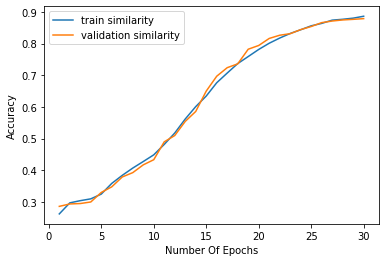

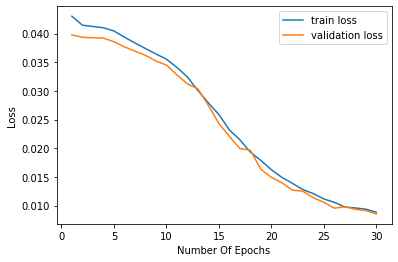

In [ ]:

def omega_model(learning_rate=1e-4):
    # Instantiate Sequential model
    model = tf.keras.models.Sequential()
    
    # Add Layers
    model.add(tf.keras.Input(shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(378, activation='relu'))
    
    
    
    # Define optimizers (Adam Optimizer), loss function and similarity metrics
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    bin_loss = tf.keras.losses.MeanSquaredError()
    sim_metrics = [tf.keras.metrics.CosineSimilarity()]
    
    # Compile the model
    model.compile(optimizer=opt, loss=bin_loss, metrics=sim_metrics)
    
    # return model
    return model
# Insert code to train with callbacks (2 points)
o_model = omega_model(learning_rate = best_Omega_lr)
        
History = o_model.fit(train_img, train_labels, validation_data=(validation_img, validation_labels),epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)
        

# Insert your code here to obtain the lists: epochs, training similarity, validation similarity, training loss, validation loss from CSV log file (1 point)
epoch= NUM_EPOCHS
n_epoch = []
train_similarity= History.history['cosine_similarity']
validation_similarity = History.history['val_cosine_similarity']
train_loss = History.history['loss']
validation_loss = History.history['val_loss']
for i in range(1,epoch+1) :  
  n_epoch.append(i)
#print(n_epoch)
# Insert your code here to plot Epochs Vs. training and validation accuracy (2 points)
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy')
plt.plot(n_epoch, train_similarity , label = "train similarity")
plt.plot(n_epoch , validation_similarity , label ="validation similarity")
plt.legend()
plt.show()  

# Insert your code here to plot Epochs Vs. training and validation loss (2 points)
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss')
plt.plot(n_epoch, train_loss , label = "train loss")
plt.plot(n_epoch , validation_loss , label ="validation loss")
plt.legend()
plt.show()  




Now build and summarize the Alpha model as per the best learning rate value determined earlier. 

---

**1 Point**

---




In [ ]:
# Insert code for building model using the best LR for Alpha model determined

A_model = Alpha_model(learning_rate = best_Alpha_lr)
print(A_model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_104 (Conv2D)          (None, 50, 250, 64)       1792      
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 50, 250, 64)       36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 25, 125, 64)       0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 25, 125, 128)      73856     
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 25, 125, 128)      147584    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 62, 128)       0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 12, 62, 256)      

Now instantiate the four callbacks for Alpha model.

---

**2 Points**

---

In [ ]:
# EarlyStopping after validation loss has not improved for 5 epochs 
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, verbose=0, mode='auto')

# ReduceLROnPlateau reducing LR by half when validation loss has not improved for 3 epochs. 

rp = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3, verbose=0,mode='auto')

# CSVlogger for keeping logs in filename of your choice
filepath = '/content/drive/MyDrive/SAMPLE/filep.csv'
cs = tf.keras.callbacks.CSVLogger(filepath, separator=',')

# ModelCheckpoint that saves the best weights of model after every 10 epochs
checkpoint_path = "/content/drive/MyDrive/SAMPLE/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
mc = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',save_best_only=True,verbose=1,save_weights_only=True)

# Make a list of all the callbacks

list_of_callbacks = [es,rp,cs,mc]


Now train the model with training data using these callbacks.

---

**7 Points**

---

Epoch 1/30
65/65 [==============================] - 19s 197ms/step - loss: 0.5265 - cosine_similarity: 0.2304 - val_loss: 0.1581 - val_cosine_similarity: 0.2965

Epoch 00001: val_loss improved from inf to 0.15810, saving model to /content/drive/MyDrive/SAMPLE/cp.ckpt
Epoch 2/30
65/65 [==============================] - 11s 175ms/step - loss: 0.1626 - cosine_similarity: 0.3066 - val_loss: 0.1582 - val_cosine_similarity: 0.2953

Epoch 00002: val_loss did not improve from 0.15810
Epoch 3/30
65/65 [==============================] - 11s 175ms/step - loss: 0.1640 - cosine_similarity: 0.3104 - val_loss: 0.1574 - val_cosine_similarity: 0.3003

Epoch 00003: val_loss improved from 0.15810 to 0.15741, saving model to /content/drive/MyDrive/SAMPLE/cp.ckpt
Epoch 4/30
65/65 [==============================] - 11s 174ms/step - loss: 0.1647 - cosine_similarity: 0.3085 - val_loss: 0.1584 - val_cosine_similarity: 0.2956

Epoch 00004: val_loss did not improve from 0.15741
Epoch 5/30
65/65 [================

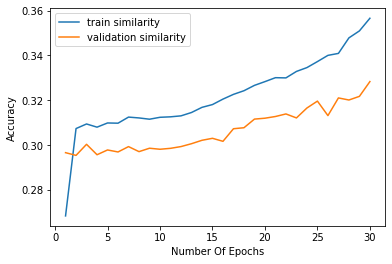

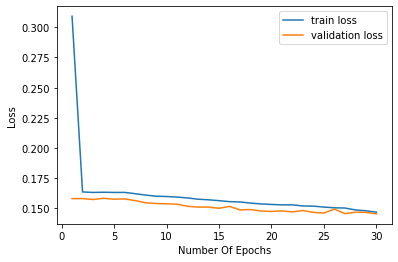

In [ ]:
# Insert code to train with callbacks (2 points)

Hist = A_model.fit(train_img, train_labels,  validation_data=(validation_img , validation_labels),callbacks=list_of_callbacks , epochs = NUM_EPOCHS)

# Insert your code here to obtain the lists: epochs, training similarity, validation similarity, training loss, validation loss from CSV log file (1 point)
epoch= NUM_EPOCHS
n_epoch = []
train_similarity= Hist.history['cosine_similarity']
validation_similarity = Hist.history['val_cosine_similarity']
train_loss = Hist.history['loss']
validation_loss = Hist.history['val_loss']
for i in range(1,epoch+1) :  
  n_epoch.append(i)


# Insert your code here to plot Epochs Vs. training and validation accuracy (2 points)
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy')
plt.plot(n_epoch, train_similarity , label = "train similarity")
plt.plot(n_epoch , validation_similarity , label ="validation similarity")
plt.legend()
plt.show()  

# Insert your code here to plot Epochs Vs. training and validation loss (2 points)
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss')
plt.plot(n_epoch, train_loss , label = "train loss")
plt.plot(n_epoch , validation_loss , label ="validation loss")
plt.legend()
plt.show()  




In [ ]:
os.listdir(checkpoint_dir)
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'/content/drive/MyDrive/SAMPLE/cp.ckpt'

## Steps for Word recognition:

First, prepare a list having all the words from test set mapped to their corresponding vectors (lexicon for both Omega and Alpha representations).

---

**1 point**

---


In [ ]:
test_list_A = []
test_list_O = []
for x in test_df['Label']:
  test_list_A.append(get_Alpha_vector(x))
  test_list_O.append(get_Omega_vector(x))

print(test_list_A)
print(test_list_O)

[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 


For every image in the test set:
1. Predict the output vector representation from the trained model(s) when the image is given as input.
2. Find the word class(from lexicon) for which the similarity of its vector representation will be highest with the output vector.
3. If predicted word = true word, then it is a correct prediction, otherwise incorrect prediction.

---

Let us now perform recognition using trained Alph amodel on the test set. 

First, load the test images and their vector representations.

---

**1 point**

---

In [ ]:
# Insert code to load test images and its vector labels (1 points)


test_df = get_dataframe(test_dir_path)
test_images = np.array([cv2.imread(os.path.join(test_dir_path , img)) for img in test_df.Image])
test_labels = np.array([get_Alpha_vector(word) for word in test_df.Label])


             Image    Label
0      after_6.png    after
1      about_2.png    about
2    address_4.png  address
3    address_2.png  address
4    address_0.png  address
..             ...      ...
395     work_6.png     work
396     with_2.png     with
397        x_5.png        x
398     year_3.png     year
399      you_0.png      you

[400 rows x 2 columns]
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

Now load the saved trained Alpha model from the file and predict the labels

---

**1+3 points**

---

In [ ]:
# Insert code for loading the saved model from file 
# Create a new model instance
a_model = Alpha_model()
a_model.load_weights(latest)
# Save the weights
a_model.save_weights('./checkpoints/my_checkpoint')
# Create a new model instance
a_model = Alpha_model()
a_model.load_weights('./checkpoints/my_checkpoint')
a_model.fit(train_img, train_labels, epochs=30)
!mkdir -p saved_model
a_model.save('saved_model/my_model') 
new_model = tf.keras.models.load_model('saved_model/my_model')

# Checking its architecture
new_model.summary()

Epoch 1/30
65/65 [==============================] - 12s 172ms/step - loss: 0.1467 - cosine_similarity: 0.3633
Epoch 2/30
65/65 [==============================] - 11s 175ms/step - loss: 0.1447 - cosine_similarity: 0.3689
Epoch 3/30
65/65 [==============================] - 11s 175ms/step - loss: 0.1457 - cosine_similarity: 0.3706
Epoch 4/30
65/65 [==============================] - 11s 173ms/step - loss: 0.1437 - cosine_similarity: 0.3723
Epoch 5/30
65/65 [==============================] - 11s 171ms/step - loss: 0.1436 - cosine_similarity: 0.3741
Epoch 6/30
65/65 [==============================] - 11s 170ms/step - loss: 0.1413 - cosine_similarity: 0.3850
Epoch 7/30
65/65 [==============================] - 11s 170ms/step - loss: 0.1422 - cosine_similarity: 0.3824
Epoch 8/30
65/65 [==============================] - 11s 170ms/step - loss: 0.1412 - cosine_similarity: 0.3900
Epoch 9/30
65/65 [==============================] - 11s 171ms/step - loss: 0.1396 - cosine_similarity: 0.3977
Epoch 10/3

In [ ]:
# Insert code for predicting word labels of the test set images 
new_model.predict(test_images)
#checking the shape
print(new_model.predict(test_images).shape)


(400, 378)


Let us evaluate the performance of the model. The effective accuracy of model is defined as harmonic mean(HM) of accuracy with seen class images and accuracy with unseen class images.

---

**2 Points**

---

In [ ]:
# Insert code to compute accuracy of images that belong to seen classes 

loss, acc1 = new_model.evaluate(train_img, train_labels, verbose=1)
print(' Model accuracy for seen classes: {:5.2f}%'.format(100 * acc1))


# Insert code to compute accuracy of images that belong to unseen classes

loss, acc2 = new_model.evaluate(test_images, test_labels, verbose=2)
print('Model accuracy for unseen classes: {:5.2f}%'.format(100 * acc2))

# Insert code to compute effective accuracy
print("Effective accuracy = ",((acc1+acc2)/2))



65/65 [==============================] - 4s 56ms/step - loss: 0.0570 - cosine_similarity: 0.7792
 Model accuracy for seen classes: 77.92%
13/13 - 1s - loss: 0.1175 - cosine_similarity: 0.6257
Model accuracy for unseen classes: 62.57%
Effective accuracy =  0.7024127840995789


Let us now perform recognition using trained Omega model on the test set.
 
First, load the test images and their Omega vector representations.

---

**1 Points**

---

In [ ]:
    # Insert code to load test images and its vector labels

test_images_O = np.array([cv2.imread(os.path.join(test_dir_path , img)) for img in test_df.Image])
test_labels_O = np.array([get_Omega_vector(word) for word in test_df.Label])
print(test_images_O)
print(test_labels_O)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

Now load the saved trained Omega model from the file and predict the labels

---

**1+3 Points**

---

In [ ]:
def Omegamodel(learning_rate=1e-4):
    # Instantiate Sequential model
    model = tf.keras.models.Sequential()
    
    # Add Layers
    model.add(tf.keras.Input(shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu',padding='same'))
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    model.add(tf.keras.layers.Dense(378, activation='relu'))
    
    
    
    # Define optimizers (Adam Optimizer), loss function and similarity metrics
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    bin_loss = tf.keras.losses.MeanSquaredError()
    sim_metrics = [tf.keras.metrics.CosineSimilarity()]
    
    # Compile the model
    model.compile(optimizer=opt, loss=bin_loss, metrics=sim_metrics)
    
    # return model
    return model
    

# Insert code for loading the saved model from file 
# Create a new model instance
o_model = Omegamodel()
o_model.load_weights(latest)
# Save the weights
o_model.save_weights('./checkpoints/my_checkpoint')
a_model = Omegamodel()
o_model.load_weights('./checkpoints/my_checkpoint')
o_model.fit(train_img, train_labels, epochs=30)
!mkdir -p saved_model
o_model.save('saved_modell/my_modell') 
new_omodel = tf.keras.models.load_model('saved_modell/my_modell')

# Checking its architecture
new_omodel.summary()


Epoch 1/30
65/65 [==============================] - 12s 172ms/step - loss: 0.0445 - cosine_similarity: 0.0947
Epoch 2/30
65/65 [==============================] - 11s 176ms/step - loss: 0.0437 - cosine_similarity: 0.1532
Epoch 3/30
65/65 [==============================] - 11s 174ms/step - loss: 0.0432 - cosine_similarity: 0.1712
Epoch 4/30
65/65 [==============================] - 11s 171ms/step - loss: 0.0423 - cosine_similarity: 0.1832
Epoch 5/30
65/65 [==============================] - 11s 170ms/step - loss: 0.0427 - cosine_similarity: 0.1984
Epoch 6/30
65/65 [==============================] - 11s 170ms/step - loss: 0.0420 - cosine_similarity: 0.2371
Epoch 7/30
65/65 [==============================] - 11s 170ms/step - loss: 0.0406 - cosine_similarity: 0.2760
Epoch 8/30
65/65 [==============================] - 11s 171ms/step - loss: 0.0406 - cosine_similarity: 0.3101
Epoch 9/30
65/65 [==============================] - 11s 172ms/step - loss: 0.0401 - cosine_similarity: 0.3212
Epoch 10/3

In [ ]:
# Insert code for predicting word labels of the test set images

print(new_omodel.predict(test_images))
#checking the shape
print(new_omodel.predict(test_images).shape)


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.05059841 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.11566963 ... 0.         0.26305532 0.        ]]
(400, 378)


Evaluate the performance of the Omega model

---

**2 Points**

---

In [ ]:
# Insert code to compute accuracy of images that belong to seen classes
loss, acc = new_omodel.evaluate(train_img, train_labels, verbose=2)
print(acc)
print(' Model accuracy for seen classes: {:5.2f}%'.format(100 * acc))


# Insert code to compute accuracy of images that belong to unseen classes

loss, acc = new_omodel.evaluate(test_images, test_labels, verbose=2)
print('Model accuracy for unseen classes: {:5.2f}%'.format(100 * acc))

print('Effective Accuracy : ',(acc1+acc2)/2)



65/65 - 4s - loss: 0.0310 - cosine_similarity: 0.5288
0.5287593603134155
 Model accuracy for seen classes: 52.88%
13/13 - 1s - loss: 0.0381 - cosine_similarity: 0.4784
Model accuracy for unseen classes: 47.84%
Effective Accuracy :  0.7024127840995789


# Results
Based on your experimental outcome and your observations, which representation is better, according to you? 

---

**2 Points**

---

Based on the experimental outcomes, the effective accuracy of Omega model is much less than the alpha model. Hence Alpha model is better

We have used only words from the test set to find the matching word. How could results be affected if the lexicon had both: train and test words?

---

**2 Points**

---

If the lexicon had both the test and train images then  the accuracy would have improved because of more data and more experience